In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = [" fLength", "fWidth", "fSize", "fConc", "fConc1",
        "fAsym", "fM3Long", "fM3Trans", "fAlpha", "fDist",
        "class"]

df = pd.read_csv("magic04.data", names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [3]:
df['class'].values

array(['g', 'g', 'g', ..., 'h', 'h', 'h'], dtype=object)

In [3]:
df["class"] = (df["class"] == "g").astype(int)
df['class'].values

array([1, 1, 1, ..., 0, 0, 0])

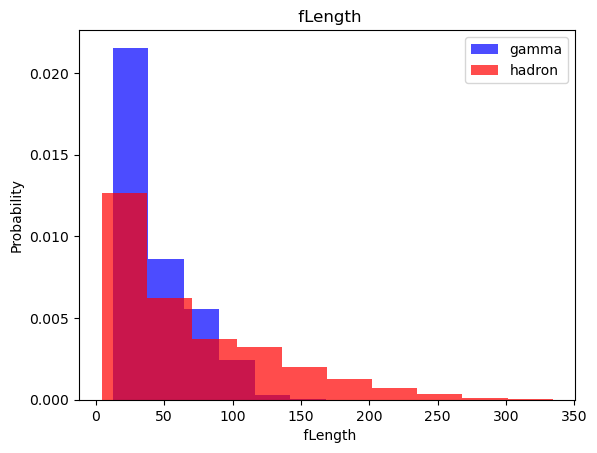

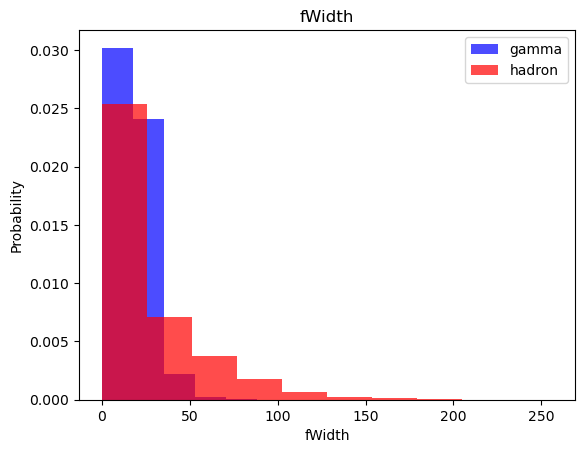

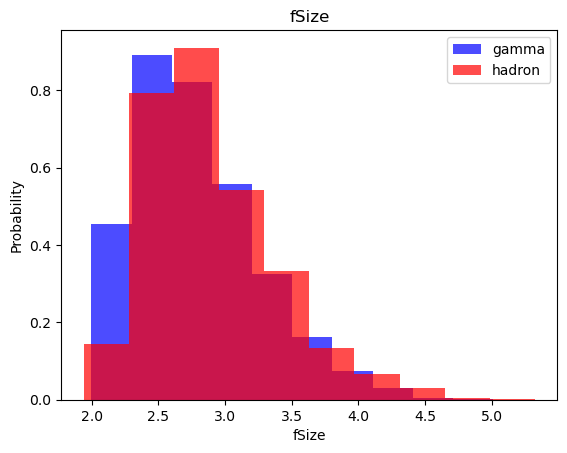

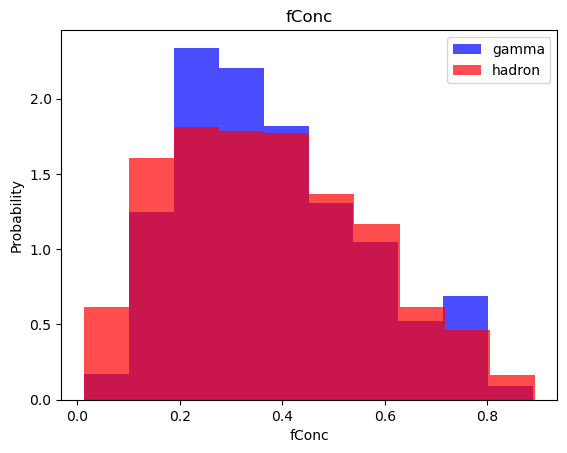

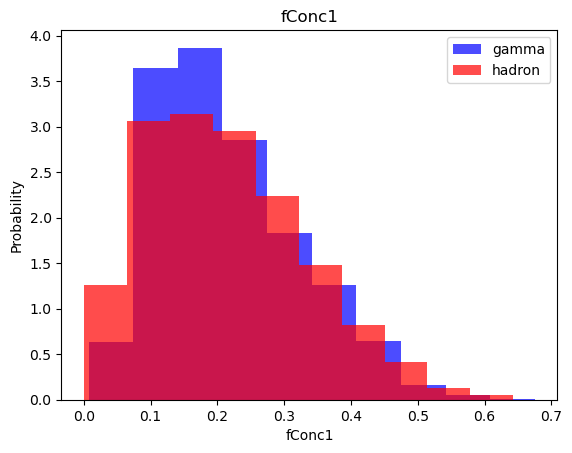

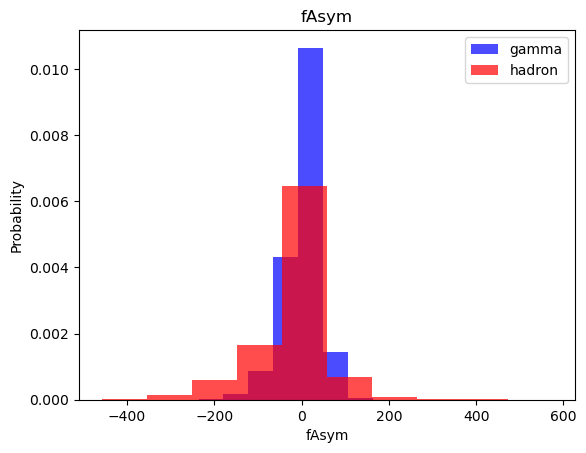

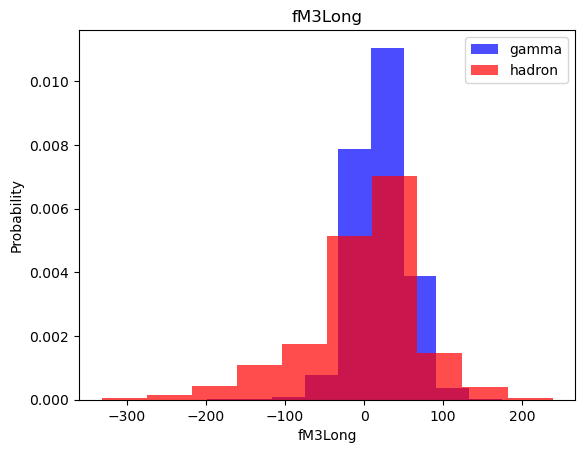

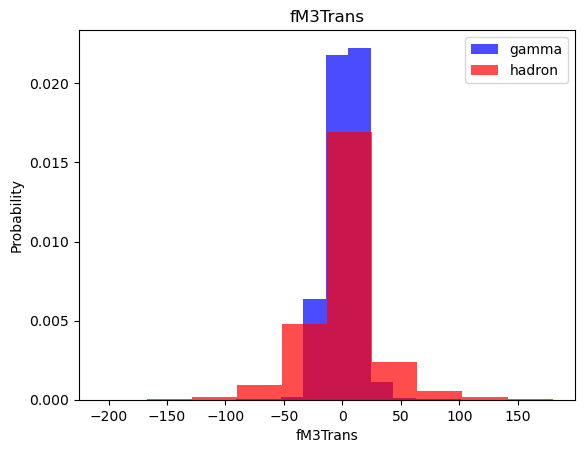

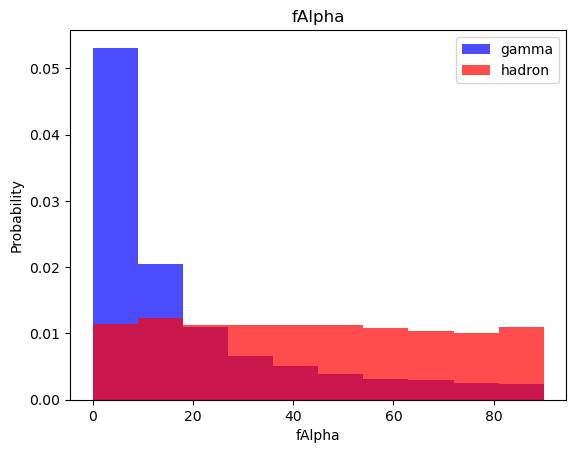

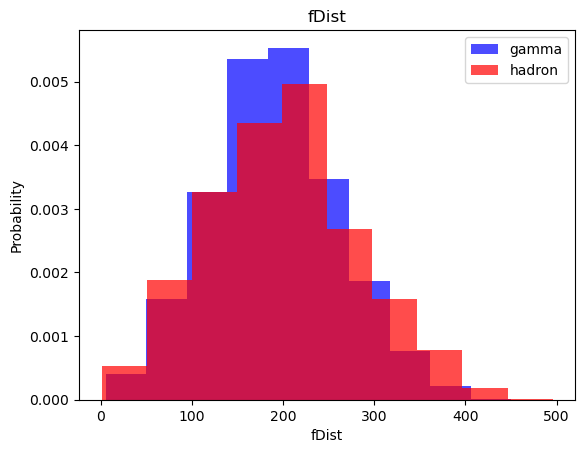

In [4]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label], color='blue', label='gamma', alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label], color='red', label='hadron', alpha= 0.7, density=True)
    plt.title(label)
    plt.ylabel("Probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()



# Train, Validation, Test dataset

In [6]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [7]:
def scale_dataset(dataframe, overSample = False):
    x = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    x = scaler.fit_transform(x)

    if overSample:
        ros = RandomOverSampler()
        x,y = ros.fit_resample(x,y)
    
    data = np.hstack((x, np.reshape(y,(-1,1))))

    return data, x, y

In [8]:
train, X_train, Y_train = scale_dataset(train, overSample=True)
valid, X_valid, Y_valid = scale_dataset(valid,overSample=False)
test, X_test, Y_test = scale_dataset(test, overSample=False)

# KNN


In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [10]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
Y_pred = knn_model.predict(X_test)

In [12]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1362
           1       0.85      0.85      0.85      2442

    accuracy                           0.80      3804
   macro avg       0.79      0.79      0.79      3804
weighted avg       0.80      0.80      0.80      3804



# Naive Bayes

In [13]:
from sklearn.naive_bayes import GaussianNB

In [14]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train,Y_train)

In [15]:
Y_pred = nb_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.71      0.41      0.52      1362
           1       0.73      0.91      0.81      2442

    accuracy                           0.73      3804
   macro avg       0.72      0.66      0.66      3804
weighted avg       0.72      0.73      0.70      3804



# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
lr_model = LogisticRegression()
lr_model = lr_model.fit(X_train,Y_train)

In [18]:
Y_pred = lr_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.71      1362
           1       0.84      0.83      0.84      2442

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.77      3804
weighted avg       0.79      0.79      0.79      3804



# SVM (Support Vector Machines)

In [19]:
from sklearn.svm import SVC

In [20]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,Y_train)

In [21]:
Y_pred = svm_model.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1362
           1       0.88      0.90      0.89      2442

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.85      3804
weighted avg       0.86      0.86      0.86      3804



# Neural Networks

In [24]:
import tensorflow as tf

In [26]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_accuracy(history):
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()


In [33]:
def plot_history(history):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,4))

    ax1.plot(history.history['loss'], label='loss')
    ax1.plot(history.history['val_loss'], label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'], label='accuracy')
    ax2.plot(history.history['val_accuracy'], label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()


In [35]:
def train_model(X_train,Y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(num_nodes,activation='relu', input_shape = (10,)),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(num_nodes,activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',metrics=['accuracy'])
    history = nn_model.fit(
        X_train, Y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2,verbose=0
    )
    return nn_model, history

nodes : 16, dropout_prob: 0, lr: 0.005, batch_size: 16


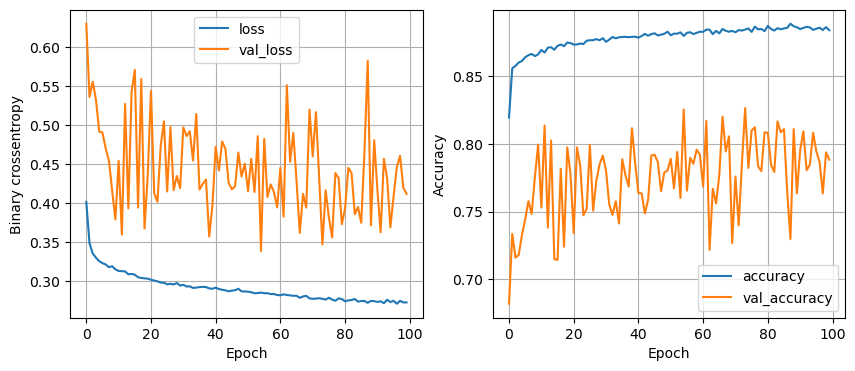

119/119 [==============================] - 0s 4ms/step - loss: 0.3174 - accuracy: 0.8722
nodes : 16, dropout_prob: 0, lr: 0.005, batch_size: 32


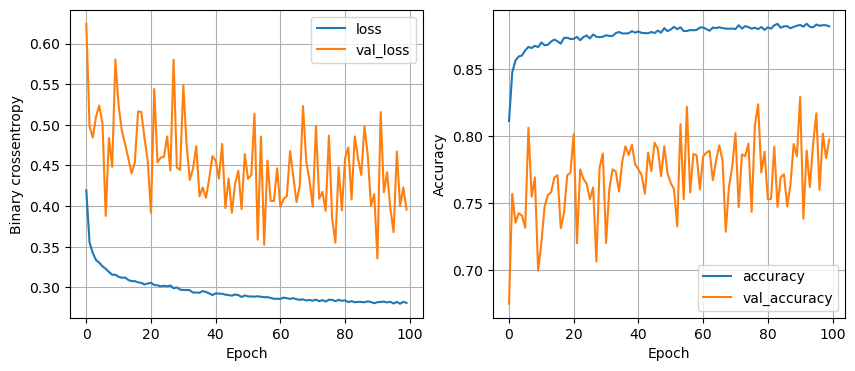

119/119 [==============================] - 0s 2ms/step - loss: 0.3221 - accuracy: 0.8644
nodes : 16, dropout_prob: 0, lr: 0.005, batch_size: 64


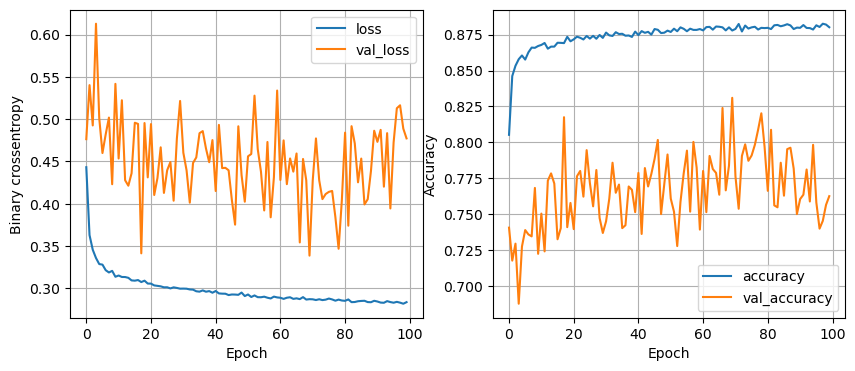

119/119 [==============================] - 0s 4ms/step - loss: 0.3127 - accuracy: 0.8715
nodes : 16, dropout_prob: 0, lr: 0.005, batch_size: 128


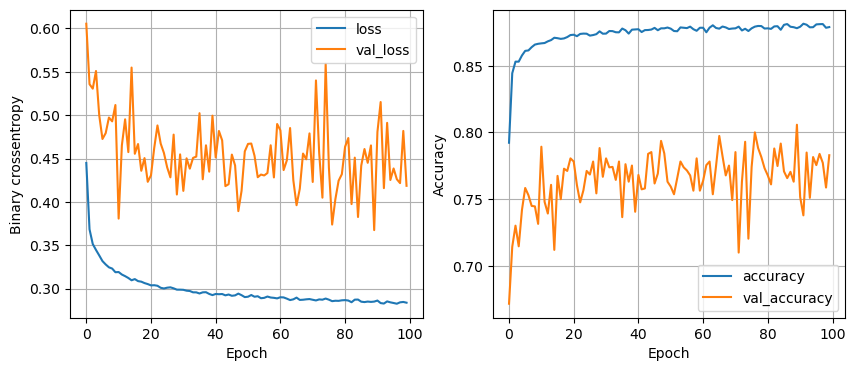

119/119 [==============================] - 0s 3ms/step - loss: 0.3138 - accuracy: 0.8657
nodes : 16, dropout_prob: 0, lr: 0.001, batch_size: 16


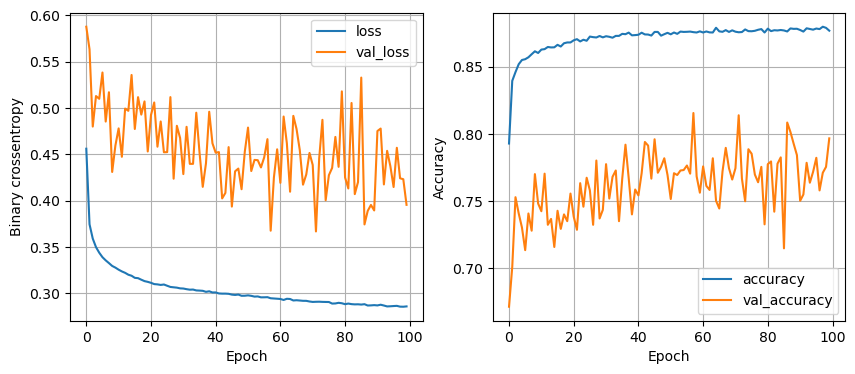

119/119 [==============================] - 0s 3ms/step - loss: 0.3169 - accuracy: 0.8715
nodes : 16, dropout_prob: 0, lr: 0.001, batch_size: 32


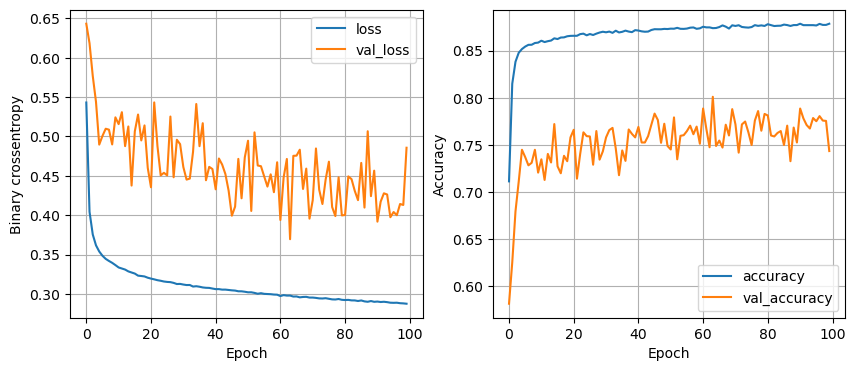

119/119 [==============================] - 0s 3ms/step - loss: 0.3159 - accuracy: 0.8691
nodes : 16, dropout_prob: 0, lr: 0.001, batch_size: 64


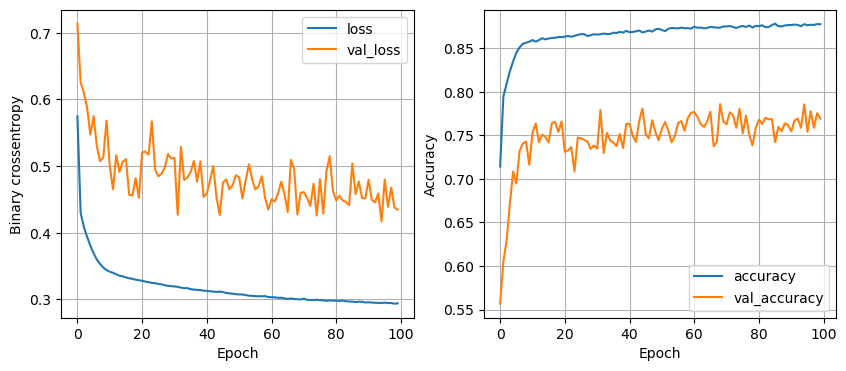

119/119 [==============================] - 0s 3ms/step - loss: 0.3177 - accuracy: 0.8701
nodes : 16, dropout_prob: 0, lr: 0.001, batch_size: 128


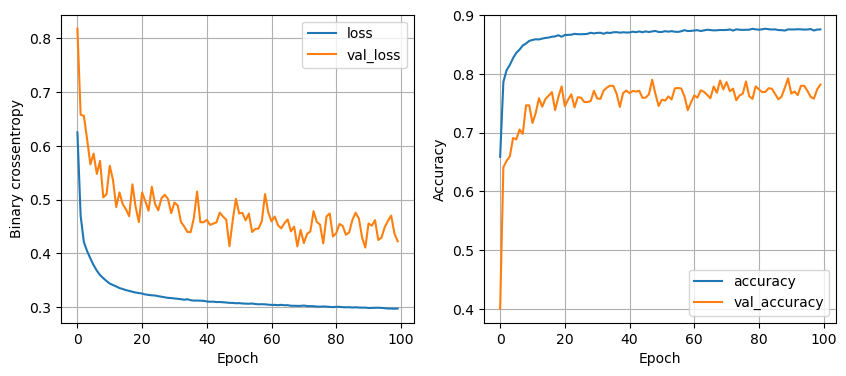

119/119 [==============================] - 0s 3ms/step - loss: 0.3154 - accuracy: 0.8704
nodes : 16, dropout_prob: 0, lr: 0.01, batch_size: 16


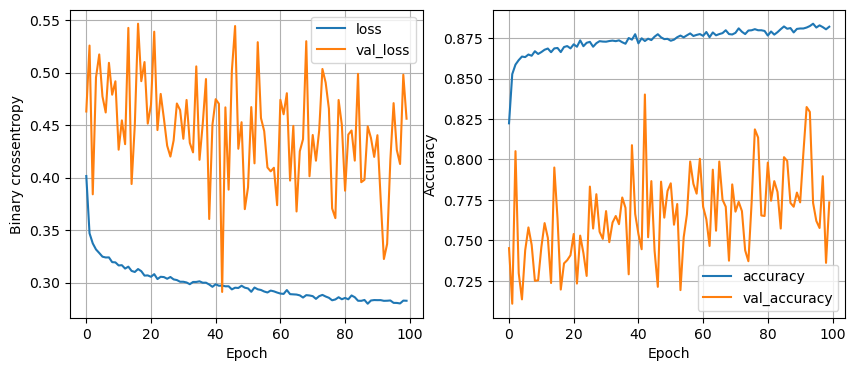

119/119 [==============================] - 0s 3ms/step - loss: 0.3174 - accuracy: 0.8722
nodes : 16, dropout_prob: 0, lr: 0.01, batch_size: 32


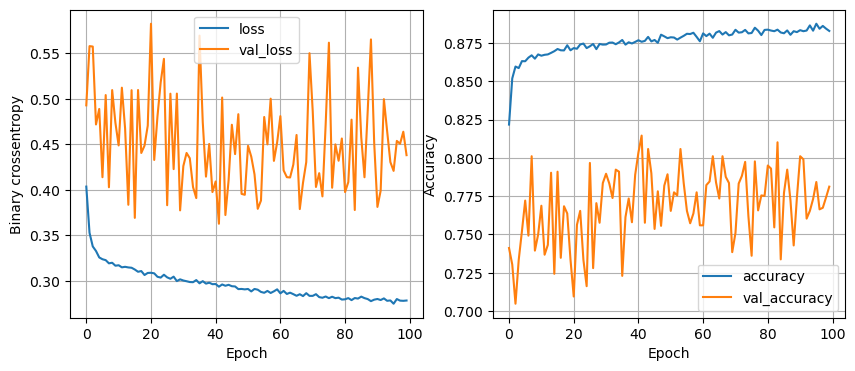

119/119 [==============================] - 0s 3ms/step - loss: 0.3254 - accuracy: 0.8691
nodes : 16, dropout_prob: 0, lr: 0.01, batch_size: 64


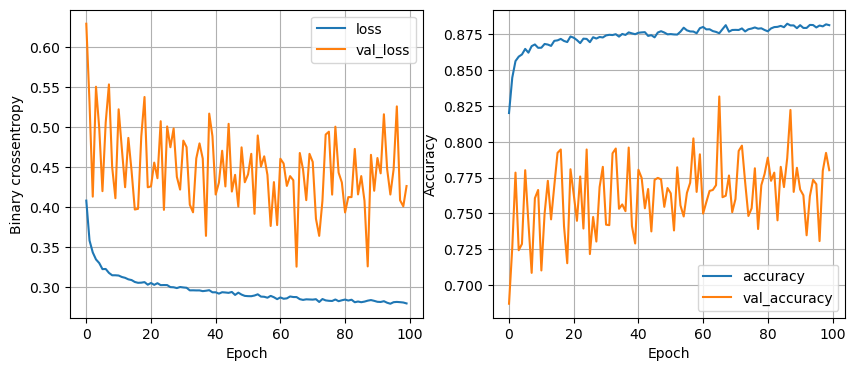

119/119 [==============================] - 0s 3ms/step - loss: 0.3188 - accuracy: 0.8651
nodes : 16, dropout_prob: 0, lr: 0.01, batch_size: 128


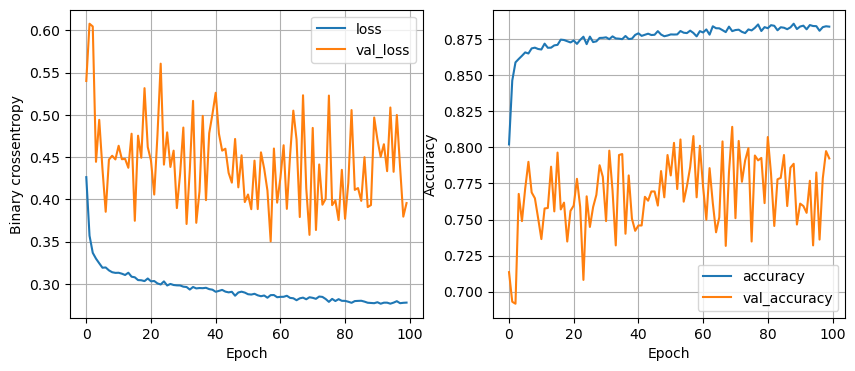

119/119 [==============================] - 0s 4ms/step - loss: 0.3264 - accuracy: 0.8630
nodes : 16, dropout_prob: 0.2, lr: 0.005, batch_size: 16


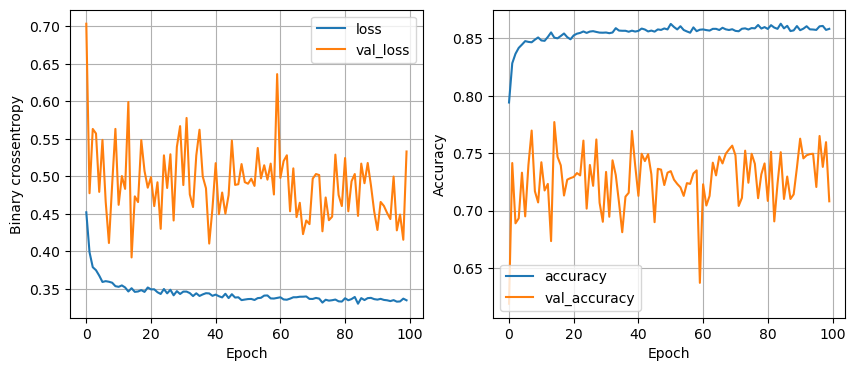

119/119 [==============================] - 0s 2ms/step - loss: 0.3164 - accuracy: 0.8638
nodes : 16, dropout_prob: 0.2, lr: 0.005, batch_size: 32


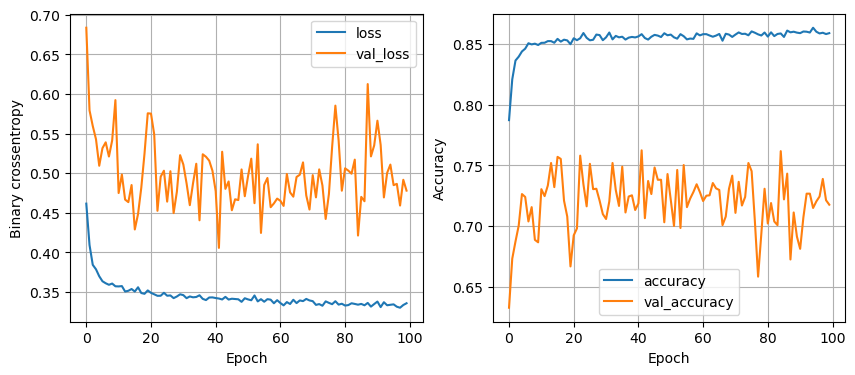

119/119 [==============================] - 1s 4ms/step - loss: 0.3205 - accuracy: 0.8696
nodes : 16, dropout_prob: 0.2, lr: 0.005, batch_size: 64


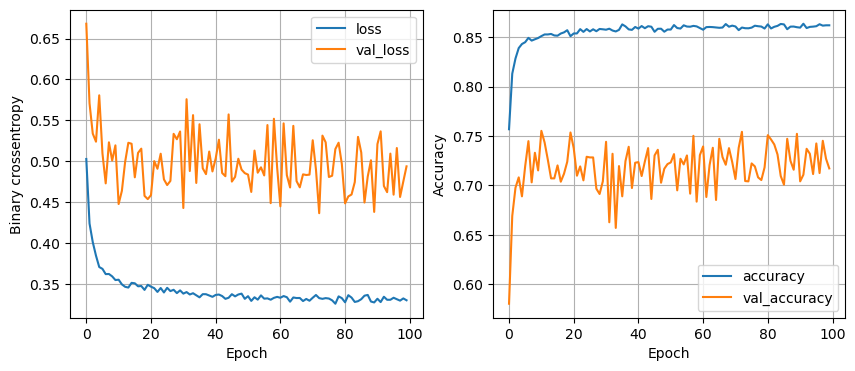

119/119 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8686
nodes : 16, dropout_prob: 0.2, lr: 0.005, batch_size: 128


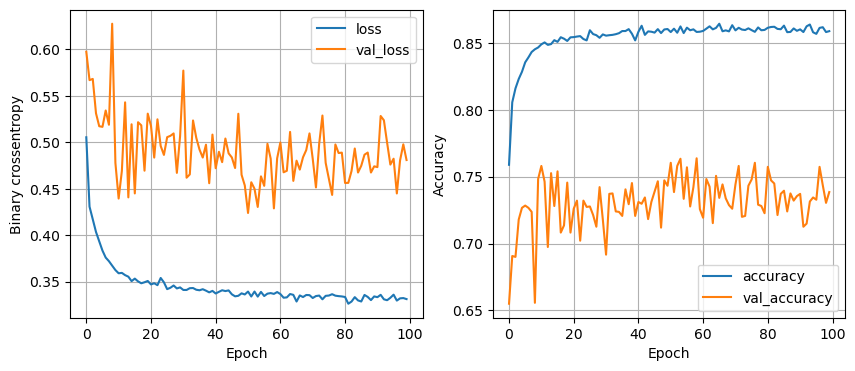

119/119 [==============================] - 0s 2ms/step - loss: 0.3124 - accuracy: 0.8691
nodes : 16, dropout_prob: 0.2, lr: 0.001, batch_size: 16


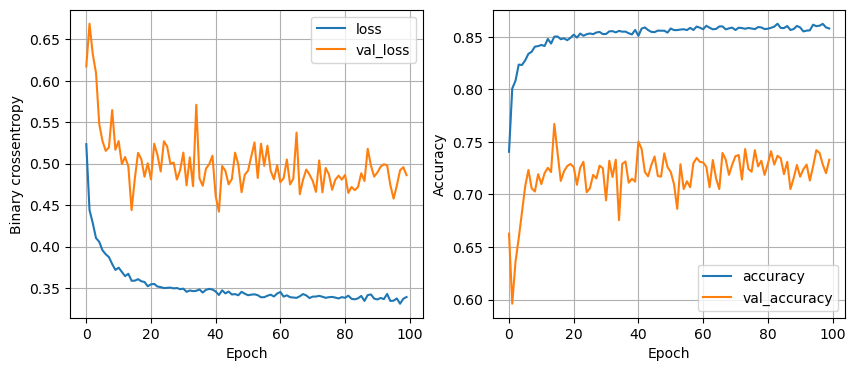

119/119 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.8662
nodes : 16, dropout_prob: 0.2, lr: 0.001, batch_size: 32


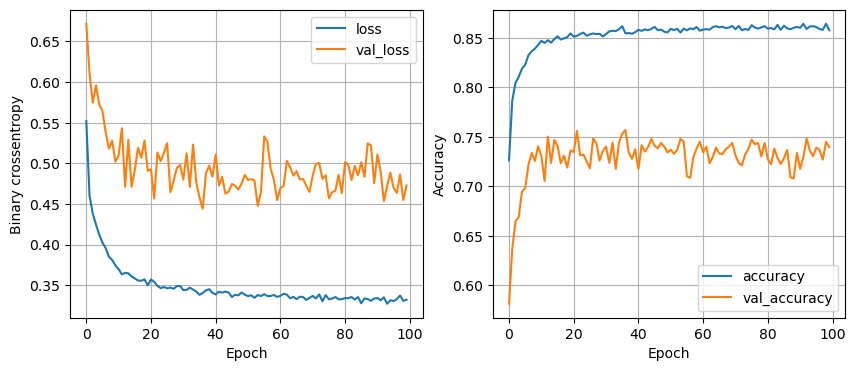

119/119 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8717
nodes : 16, dropout_prob: 0.2, lr: 0.001, batch_size: 64


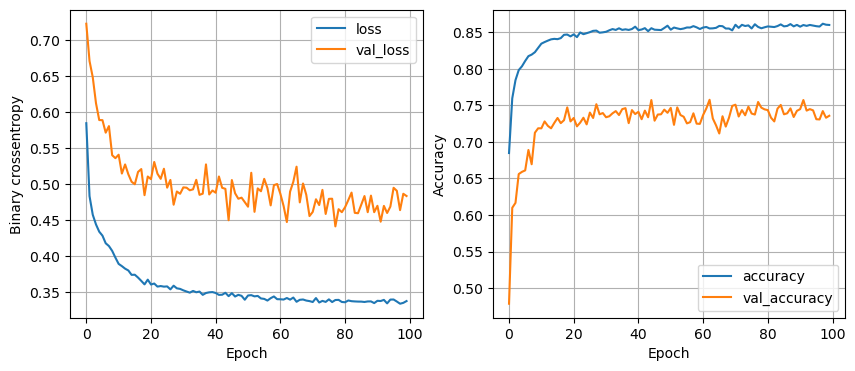

119/119 [==============================] - 0s 3ms/step - loss: 0.3130 - accuracy: 0.8707
nodes : 16, dropout_prob: 0.2, lr: 0.001, batch_size: 128


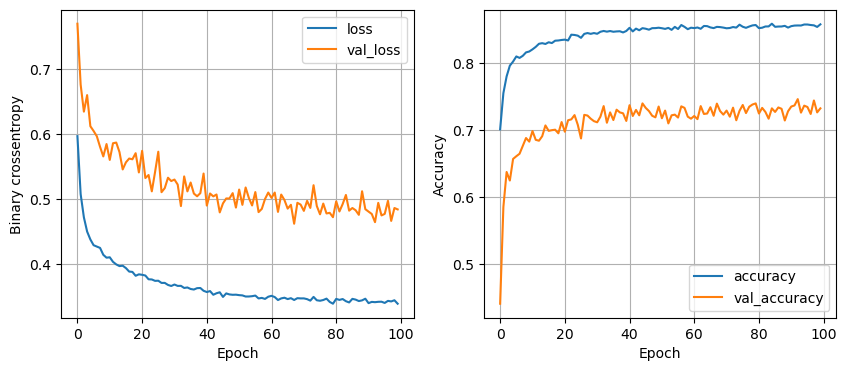

119/119 [==============================] - 0s 2ms/step - loss: 0.3186 - accuracy: 0.8688
nodes : 16, dropout_prob: 0.2, lr: 0.01, batch_size: 16


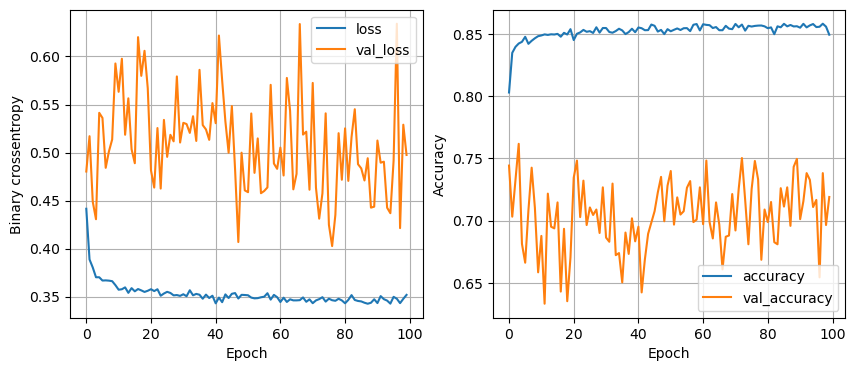

119/119 [==============================] - 0s 3ms/step - loss: 0.3203 - accuracy: 0.8665
nodes : 16, dropout_prob: 0.2, lr: 0.01, batch_size: 32


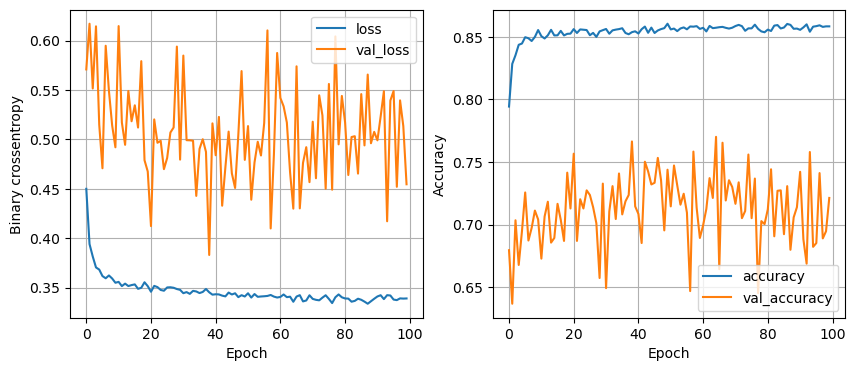

119/119 [==============================] - 0s 2ms/step - loss: 0.3208 - accuracy: 0.8691
nodes : 16, dropout_prob: 0.2, lr: 0.01, batch_size: 64


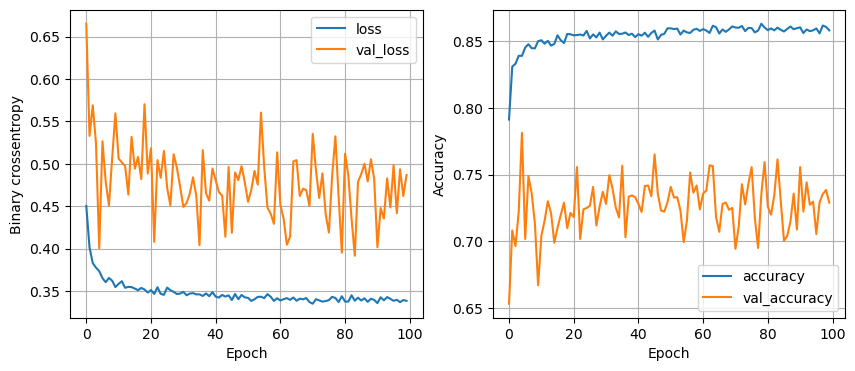

119/119 [==============================] - 0s 2ms/step - loss: 0.3233 - accuracy: 0.8672
nodes : 16, dropout_prob: 0.2, lr: 0.01, batch_size: 128


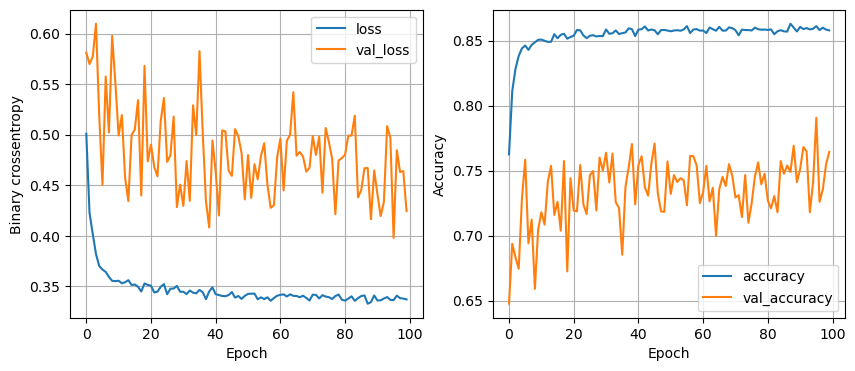

119/119 [==============================] - 0s 2ms/step - loss: 0.3247 - accuracy: 0.8683
nodes : 32, dropout_prob: 0, lr: 0.005, batch_size: 16


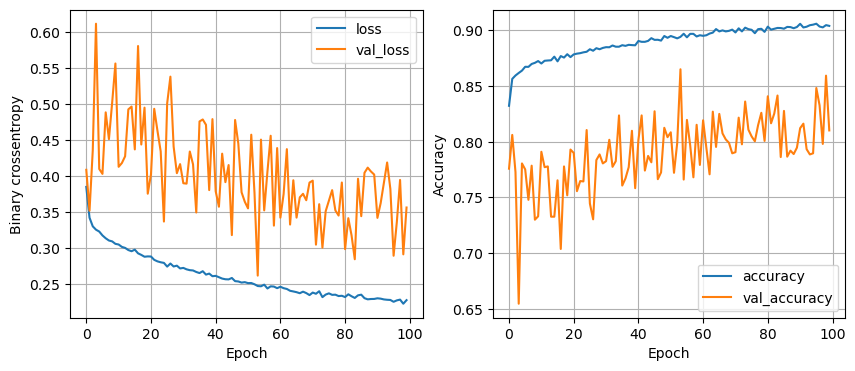

119/119 [==============================] - 0s 3ms/step - loss: 0.3998 - accuracy: 0.8562
nodes : 32, dropout_prob: 0, lr: 0.005, batch_size: 32


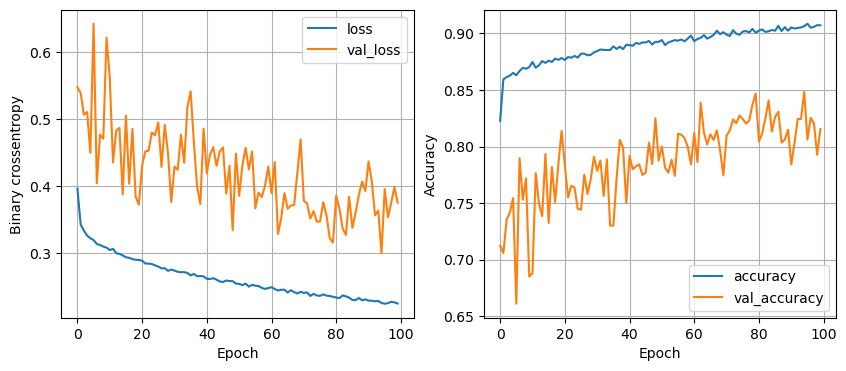

119/119 [==============================] - 0s 2ms/step - loss: 0.3810 - accuracy: 0.8620
nodes : 32, dropout_prob: 0, lr: 0.005, batch_size: 64


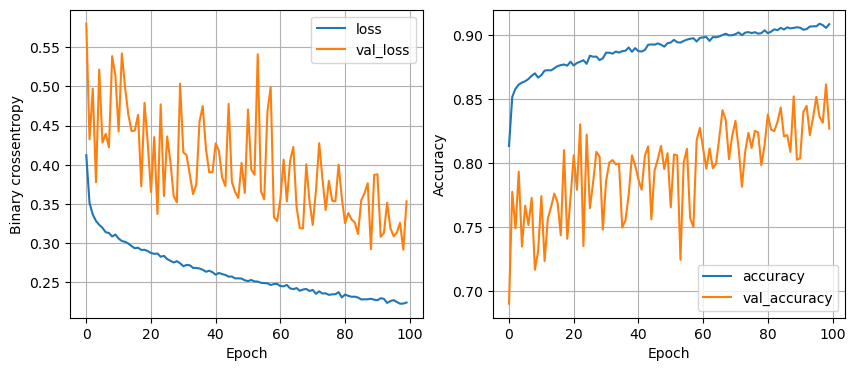

119/119 [==============================] - 0s 2ms/step - loss: 0.3728 - accuracy: 0.8536
nodes : 32, dropout_prob: 0, lr: 0.005, batch_size: 128


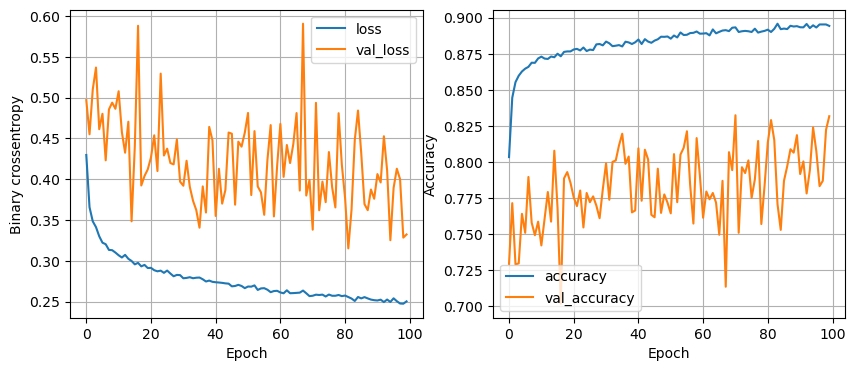

119/119 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8530
nodes : 32, dropout_prob: 0, lr: 0.001, batch_size: 16


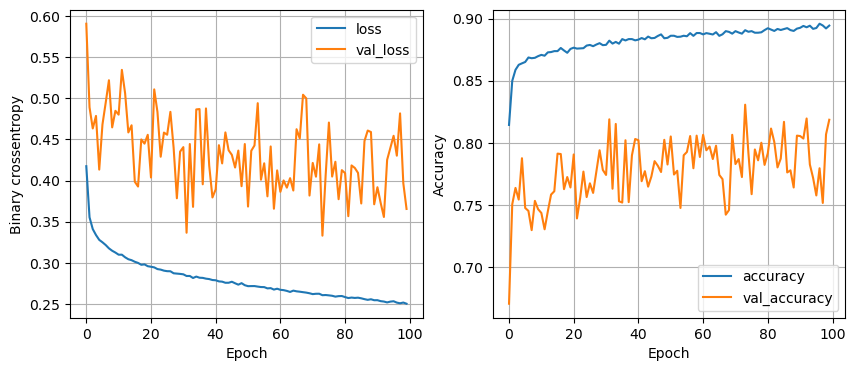

119/119 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8662
nodes : 32, dropout_prob: 0, lr: 0.001, batch_size: 32


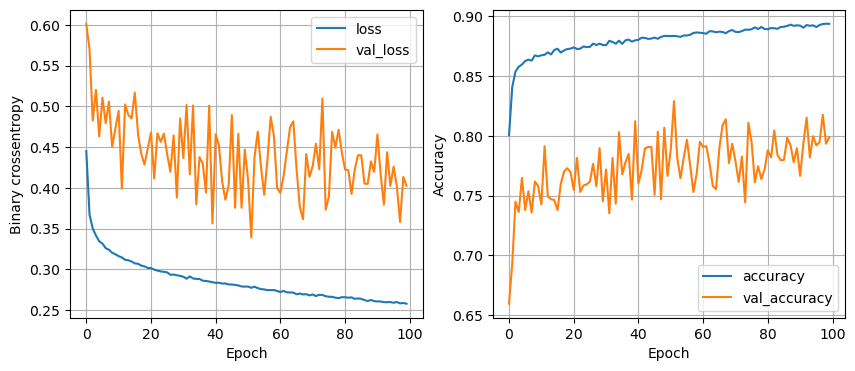

119/119 [==============================] - 0s 3ms/step - loss: 0.3195 - accuracy: 0.8707
nodes : 32, dropout_prob: 0, lr: 0.001, batch_size: 64


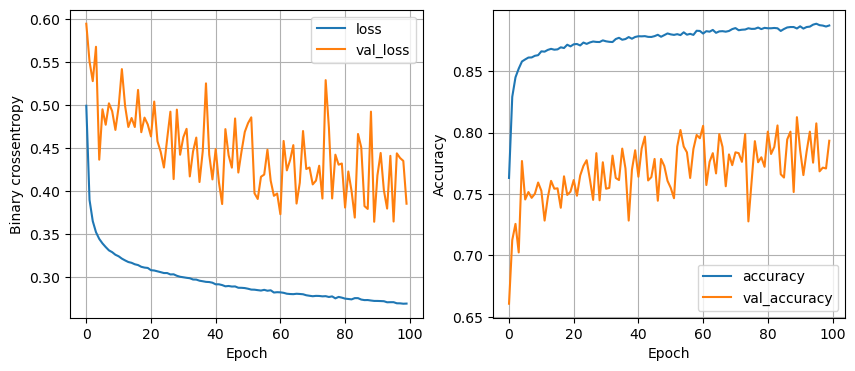

119/119 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8667
nodes : 32, dropout_prob: 0, lr: 0.001, batch_size: 128


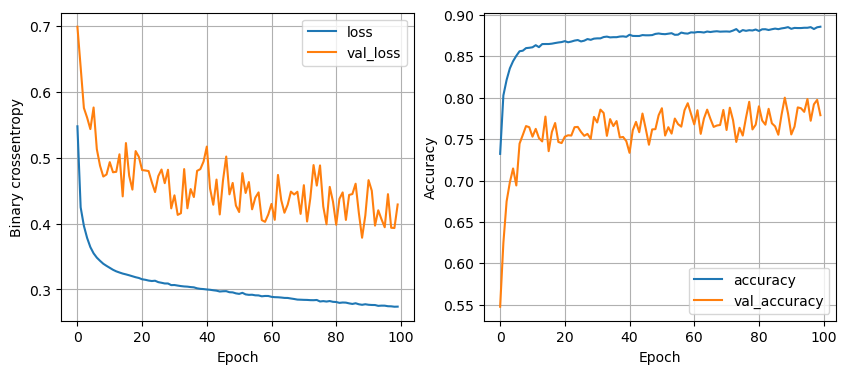

119/119 [==============================] - 0s 2ms/step - loss: 0.3148 - accuracy: 0.8707
nodes : 32, dropout_prob: 0, lr: 0.01, batch_size: 16


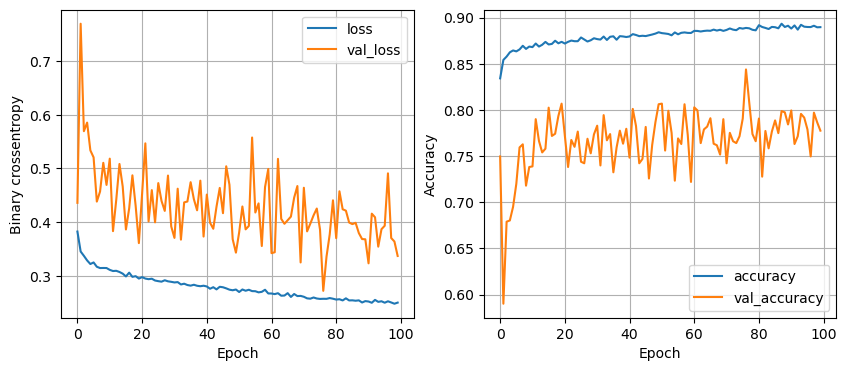

119/119 [==============================] - 0s 3ms/step - loss: 0.3759 - accuracy: 0.8596
nodes : 32, dropout_prob: 0, lr: 0.01, batch_size: 32


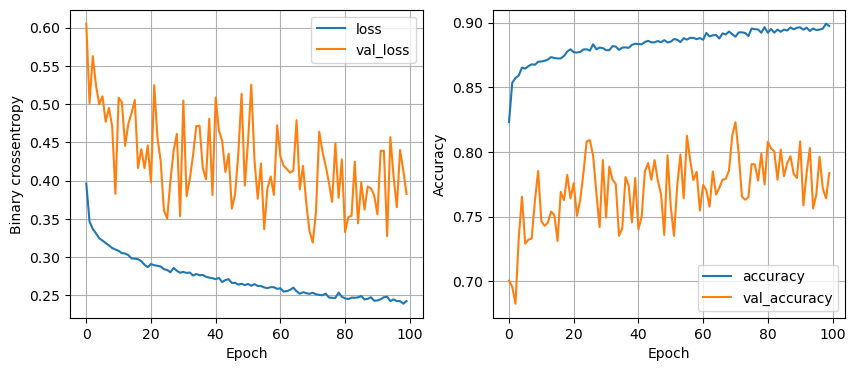

119/119 [==============================] - 0s 2ms/step - loss: 0.3740 - accuracy: 0.8623
nodes : 32, dropout_prob: 0, lr: 0.01, batch_size: 64


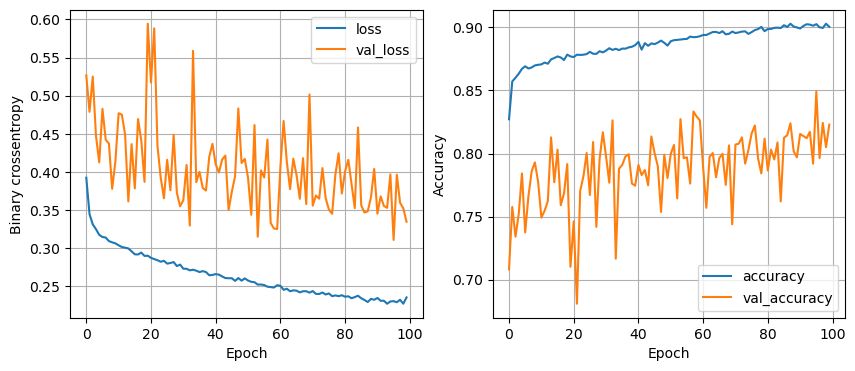

119/119 [==============================] - 0s 2ms/step - loss: 0.4137 - accuracy: 0.8586
nodes : 32, dropout_prob: 0, lr: 0.01, batch_size: 128


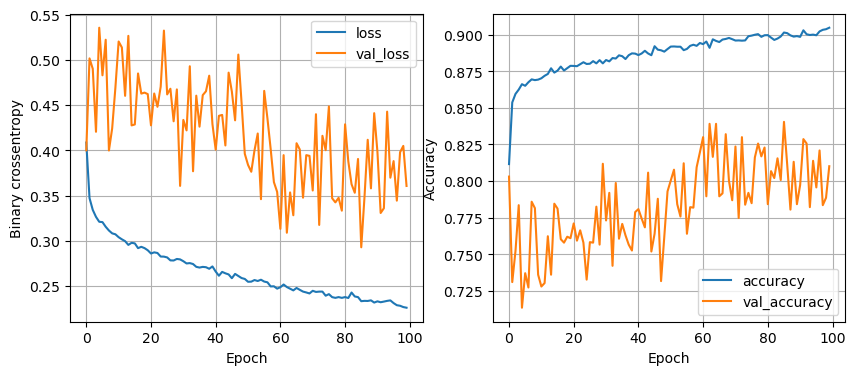

119/119 [==============================] - 0s 2ms/step - loss: 0.3730 - accuracy: 0.8649
nodes : 32, dropout_prob: 0.2, lr: 0.005, batch_size: 16


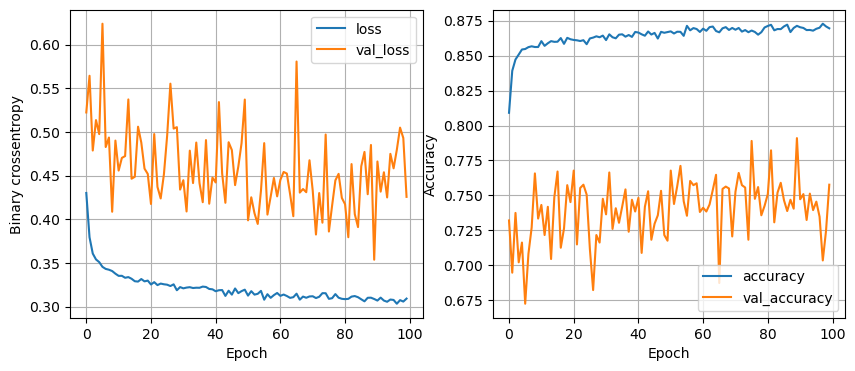

119/119 [==============================] - 0s 2ms/step - loss: 0.3089 - accuracy: 0.8717
nodes : 32, dropout_prob: 0.2, lr: 0.005, batch_size: 32


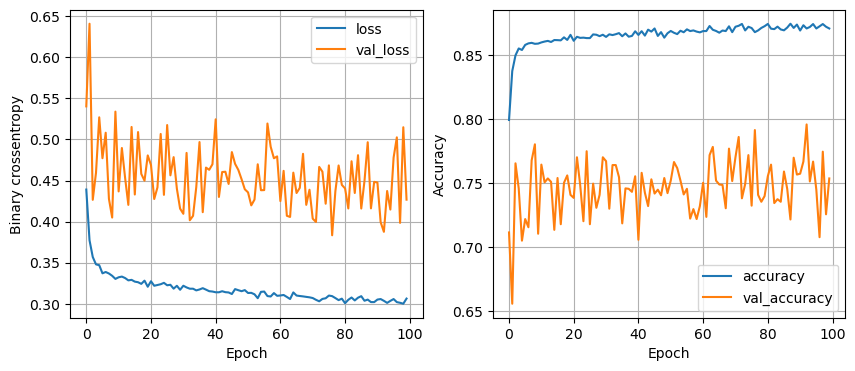

119/119 [==============================] - 0s 3ms/step - loss: 0.3079 - accuracy: 0.8701
nodes : 32, dropout_prob: 0.2, lr: 0.005, batch_size: 64


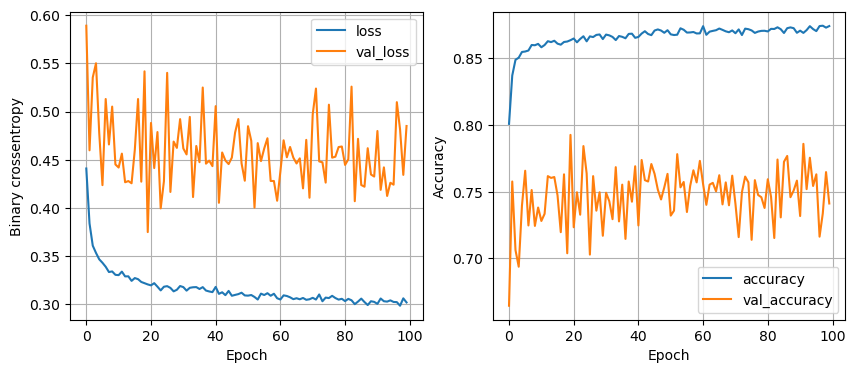

119/119 [==============================] - 0s 2ms/step - loss: 0.3058 - accuracy: 0.8712
nodes : 32, dropout_prob: 0.2, lr: 0.005, batch_size: 128


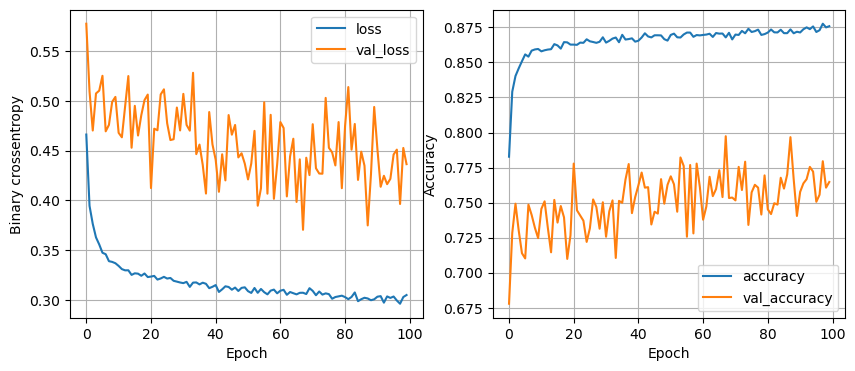

119/119 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8725
nodes : 32, dropout_prob: 0.2, lr: 0.001, batch_size: 16


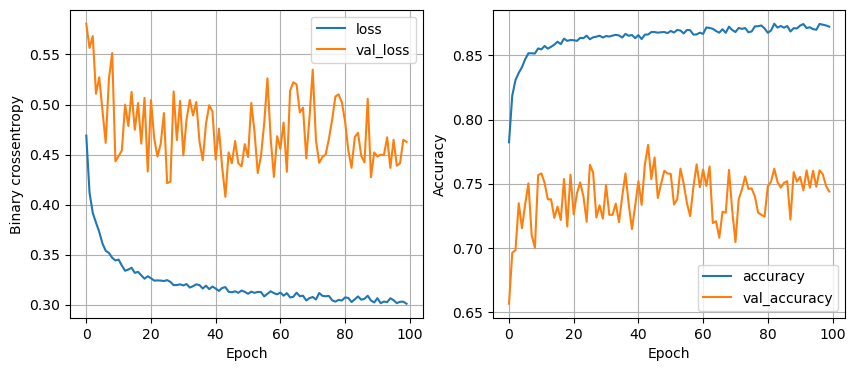

119/119 [==============================] - 0s 2ms/step - loss: 0.3023 - accuracy: 0.8717
nodes : 32, dropout_prob: 0.2, lr: 0.001, batch_size: 32


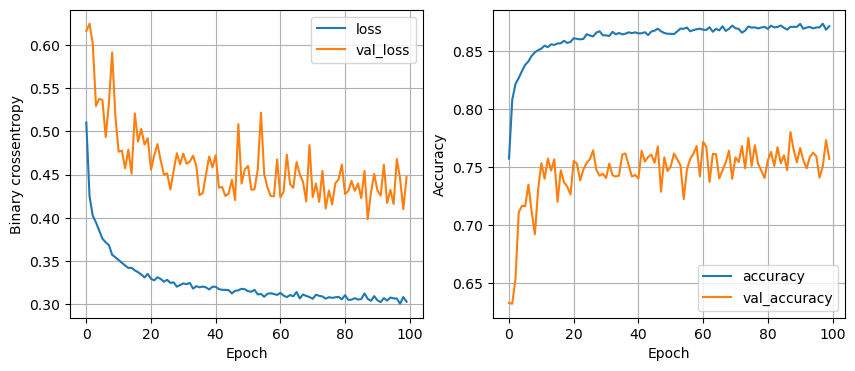

119/119 [==============================] - 0s 2ms/step - loss: 0.3019 - accuracy: 0.8725
nodes : 32, dropout_prob: 0.2, lr: 0.001, batch_size: 64


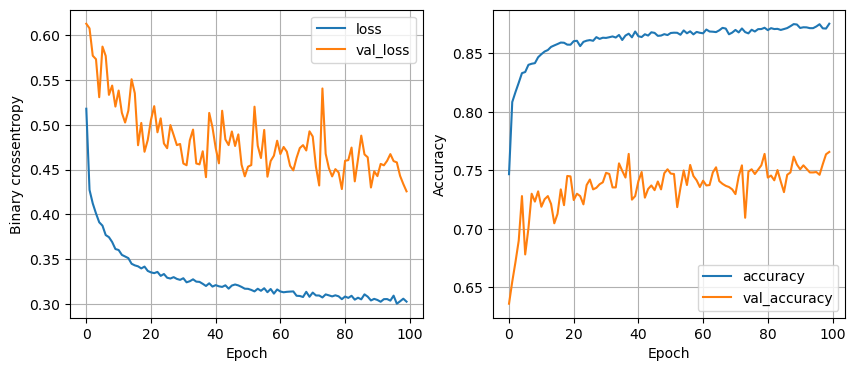

119/119 [==============================] - 0s 2ms/step - loss: 0.2987 - accuracy: 0.8757
nodes : 32, dropout_prob: 0.2, lr: 0.001, batch_size: 128


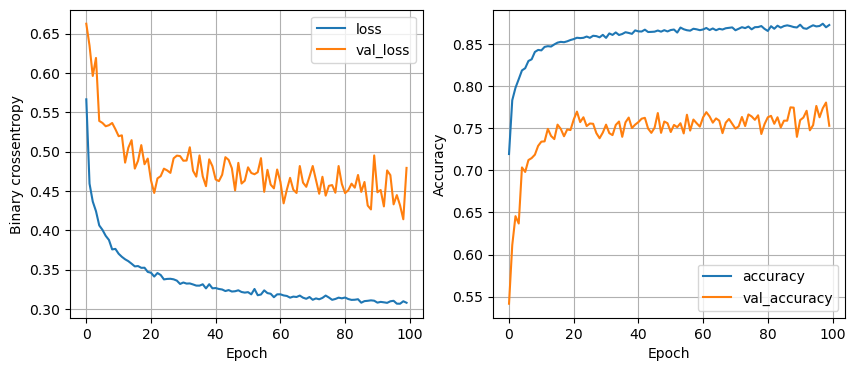

119/119 [==============================] - 0s 2ms/step - loss: 0.2991 - accuracy: 0.8764
nodes : 32, dropout_prob: 0.2, lr: 0.01, batch_size: 16


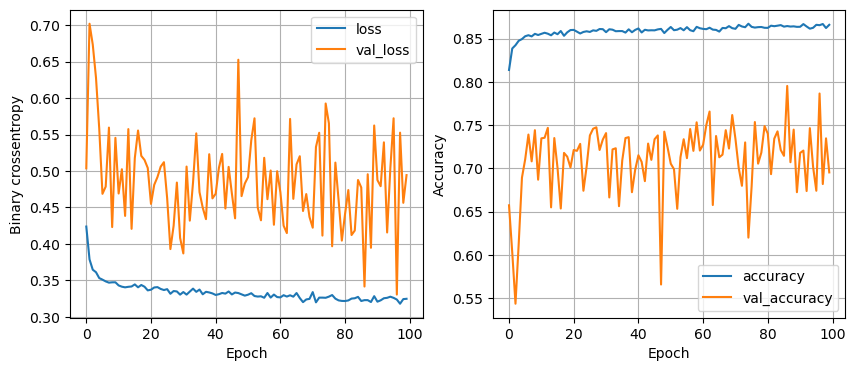

119/119 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8649
nodes : 32, dropout_prob: 0.2, lr: 0.01, batch_size: 32


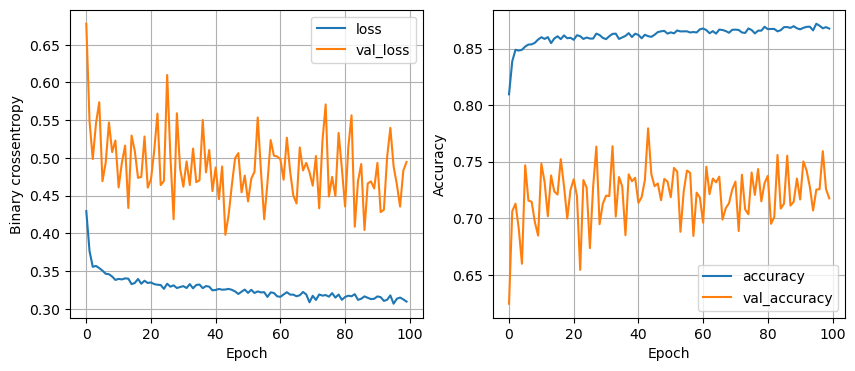

119/119 [==============================] - 0s 2ms/step - loss: 0.3099 - accuracy: 0.8728
nodes : 32, dropout_prob: 0.2, lr: 0.01, batch_size: 64


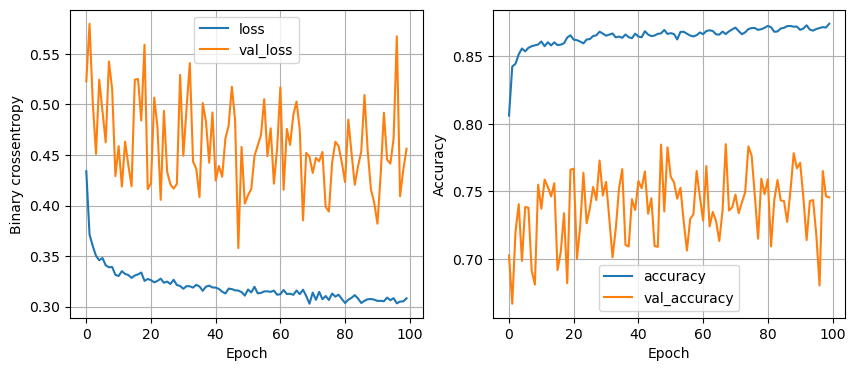

119/119 [==============================] - 0s 2ms/step - loss: 0.3009 - accuracy: 0.8746
nodes : 32, dropout_prob: 0.2, lr: 0.01, batch_size: 128


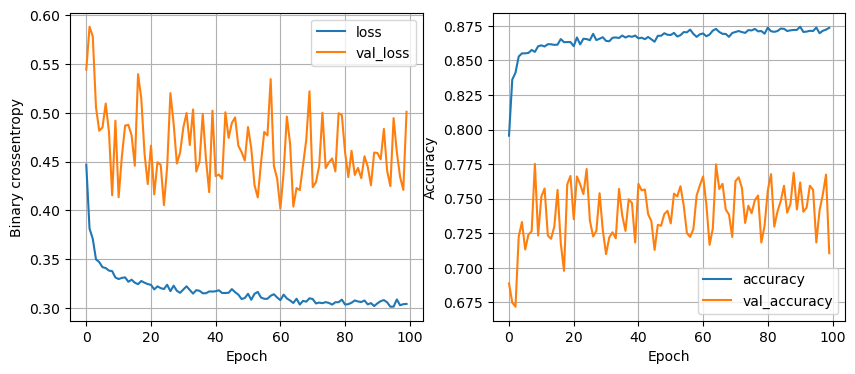

119/119 [==============================] - 0s 3ms/step - loss: 0.3043 - accuracy: 0.8701
nodes : 64, dropout_prob: 0, lr: 0.005, batch_size: 16


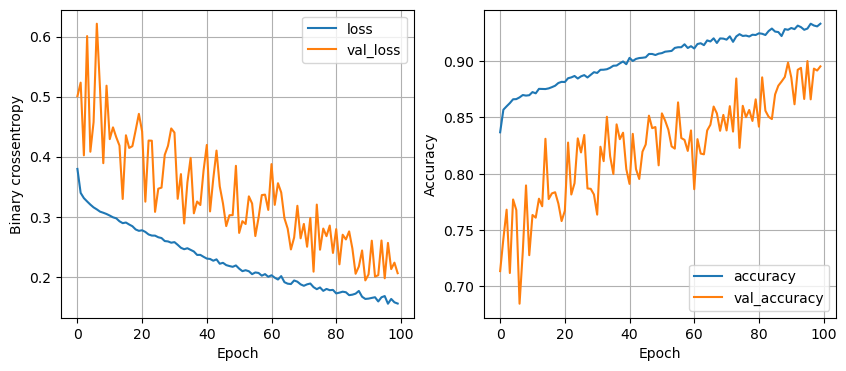

119/119 [==============================] - 0s 2ms/step - loss: 0.6439 - accuracy: 0.8470
nodes : 64, dropout_prob: 0, lr: 0.005, batch_size: 32


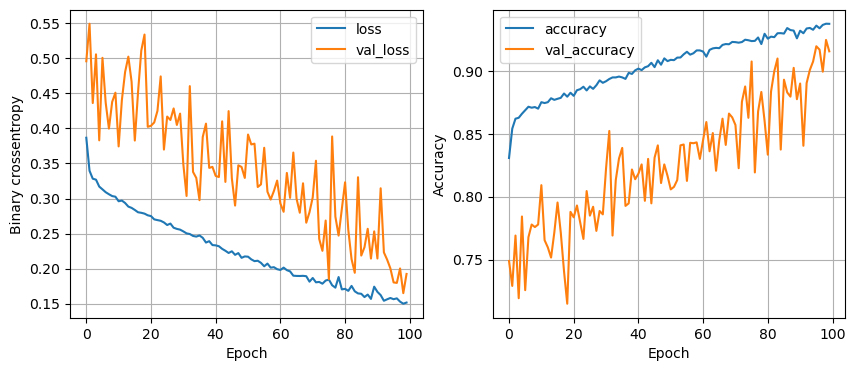

119/119 [==============================] - 0s 3ms/step - loss: 0.5857 - accuracy: 0.8381
nodes : 64, dropout_prob: 0, lr: 0.005, batch_size: 64


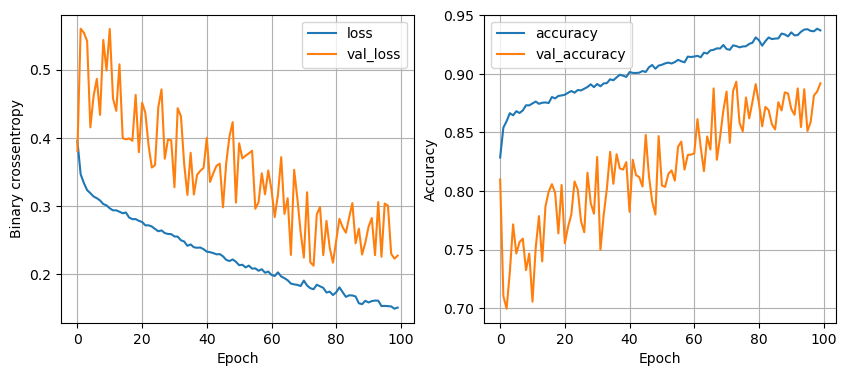

119/119 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.8483
nodes : 64, dropout_prob: 0, lr: 0.005, batch_size: 128


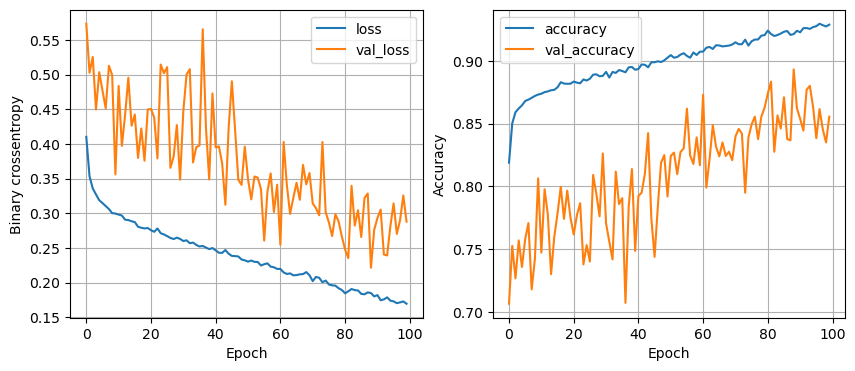

119/119 [==============================] - 0s 2ms/step - loss: 0.4744 - accuracy: 0.8612
nodes : 64, dropout_prob: 0, lr: 0.001, batch_size: 16


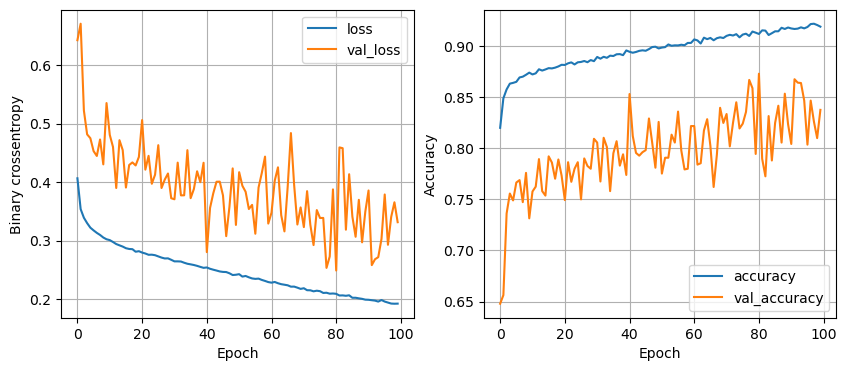

119/119 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8575
nodes : 64, dropout_prob: 0, lr: 0.001, batch_size: 32


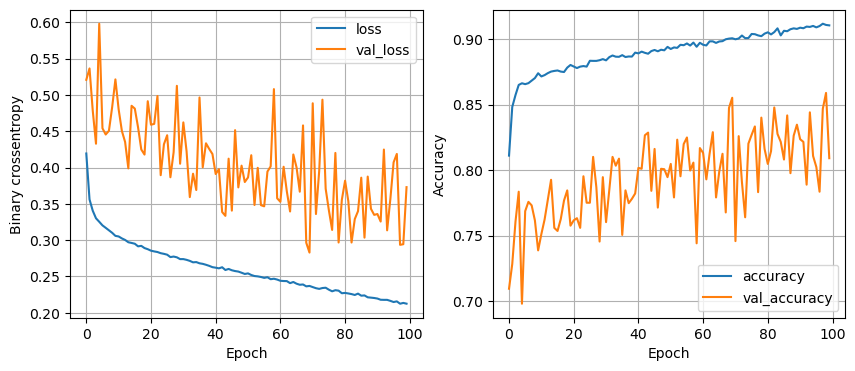

119/119 [==============================] - 0s 2ms/step - loss: 0.3520 - accuracy: 0.8628
nodes : 64, dropout_prob: 0, lr: 0.001, batch_size: 64


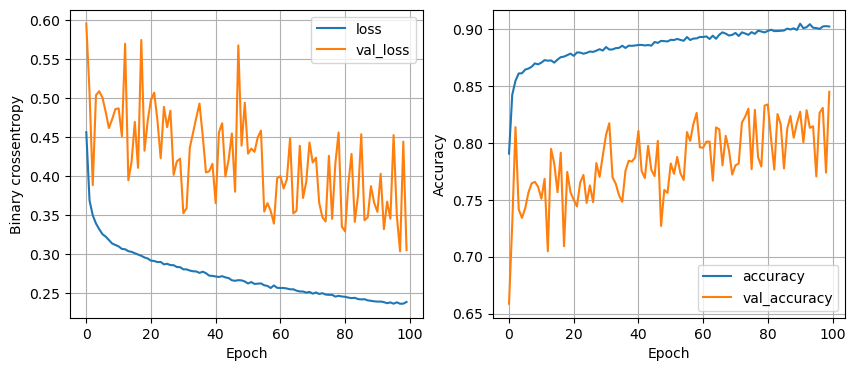

119/119 [==============================] - 0s 2ms/step - loss: 0.3484 - accuracy: 0.8583
nodes : 64, dropout_prob: 0, lr: 0.001, batch_size: 128


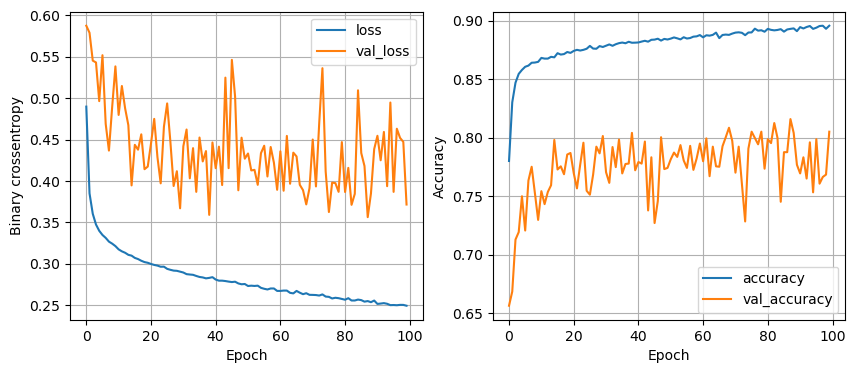

119/119 [==============================] - 0s 2ms/step - loss: 0.3237 - accuracy: 0.8693
nodes : 64, dropout_prob: 0, lr: 0.01, batch_size: 16


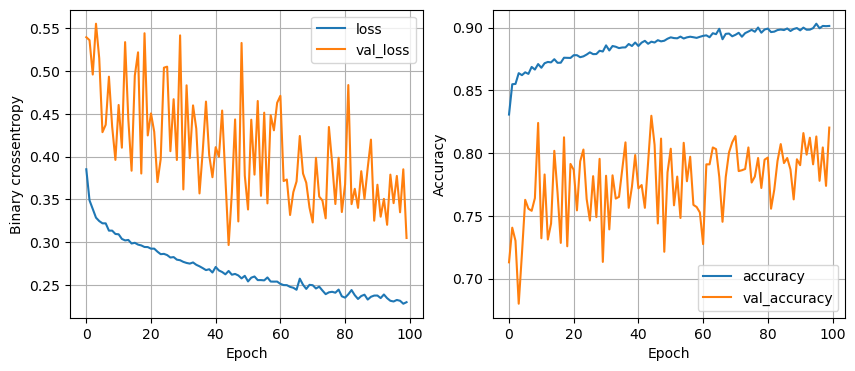

119/119 [==============================] - 0s 3ms/step - loss: 0.3711 - accuracy: 0.8638
nodes : 64, dropout_prob: 0, lr: 0.01, batch_size: 32


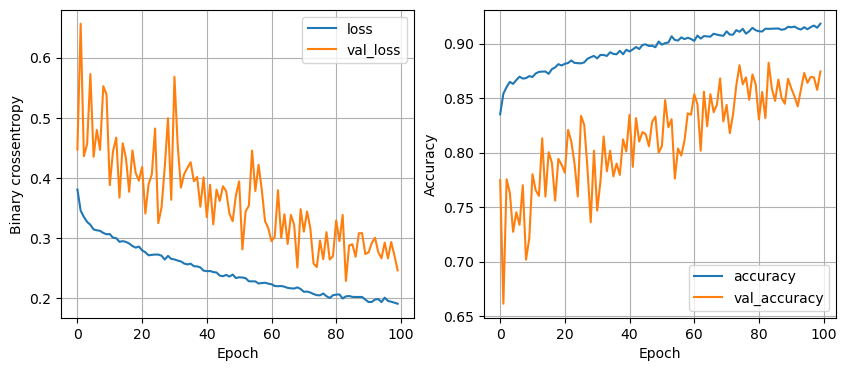

119/119 [==============================] - 0s 3ms/step - loss: 0.5083 - accuracy: 0.8530
nodes : 64, dropout_prob: 0, lr: 0.01, batch_size: 64


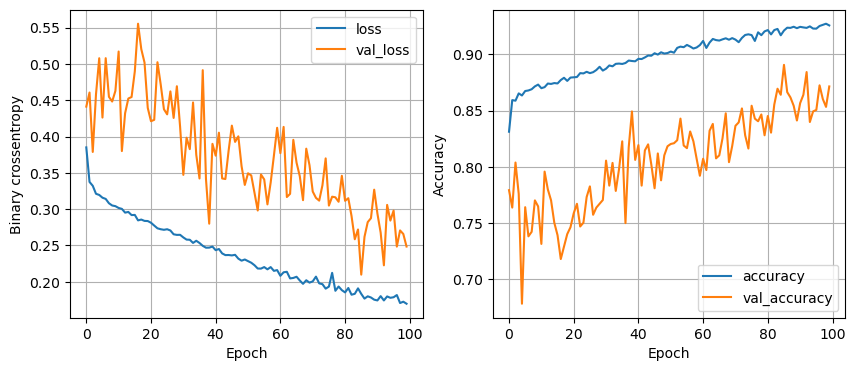

119/119 [==============================] - 0s 2ms/step - loss: 0.5889 - accuracy: 0.8483
nodes : 64, dropout_prob: 0, lr: 0.01, batch_size: 128


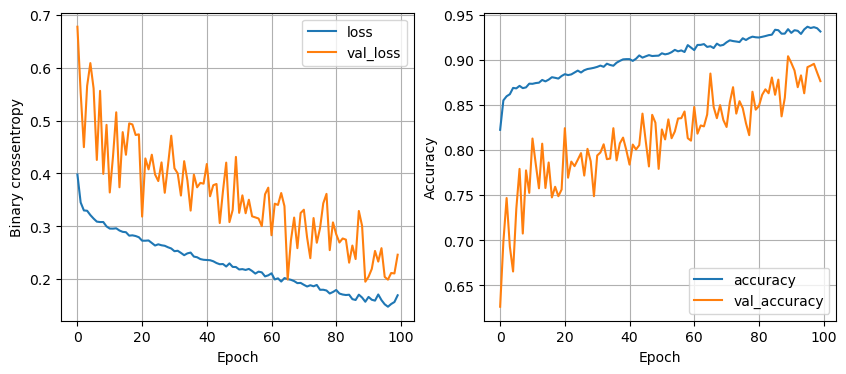

119/119 [==============================] - 0s 3ms/step - loss: 0.6029 - accuracy: 0.8444
nodes : 64, dropout_prob: 0.2, lr: 0.005, batch_size: 16


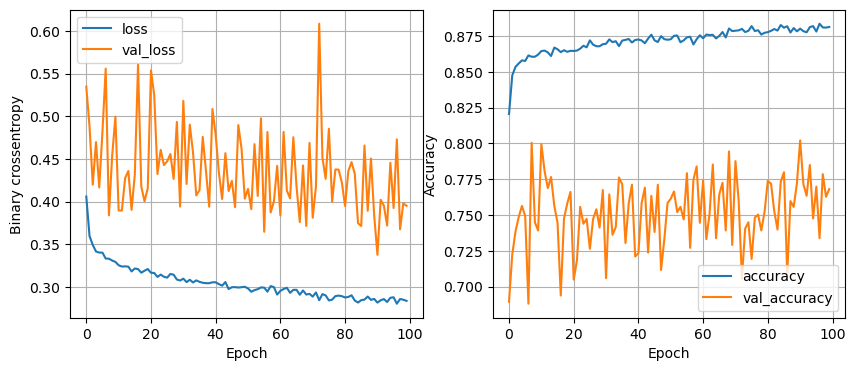

119/119 [==============================] - 0s 2ms/step - loss: 0.3168 - accuracy: 0.8712
nodes : 64, dropout_prob: 0.2, lr: 0.005, batch_size: 32


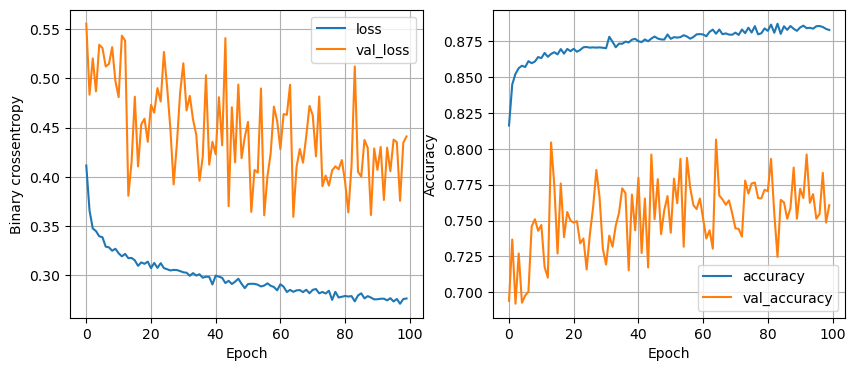

119/119 [==============================] - 0s 3ms/step - loss: 0.3070 - accuracy: 0.8715
nodes : 64, dropout_prob: 0.2, lr: 0.005, batch_size: 64


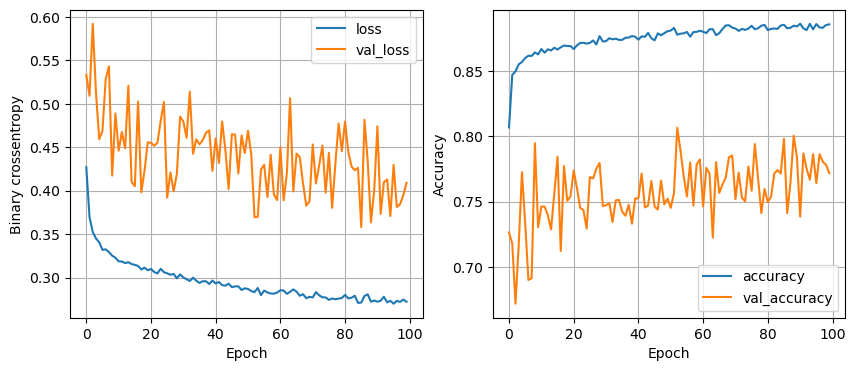

119/119 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8772
nodes : 64, dropout_prob: 0.2, lr: 0.005, batch_size: 128


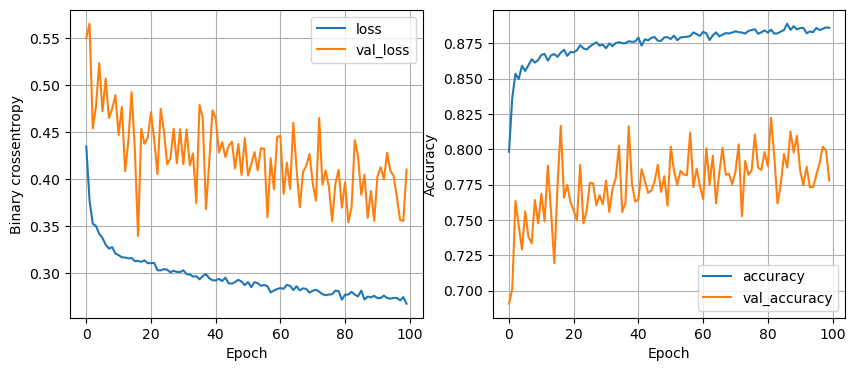

119/119 [==============================] - 0s 2ms/step - loss: 0.3049 - accuracy: 0.8730
nodes : 64, dropout_prob: 0.2, lr: 0.001, batch_size: 16


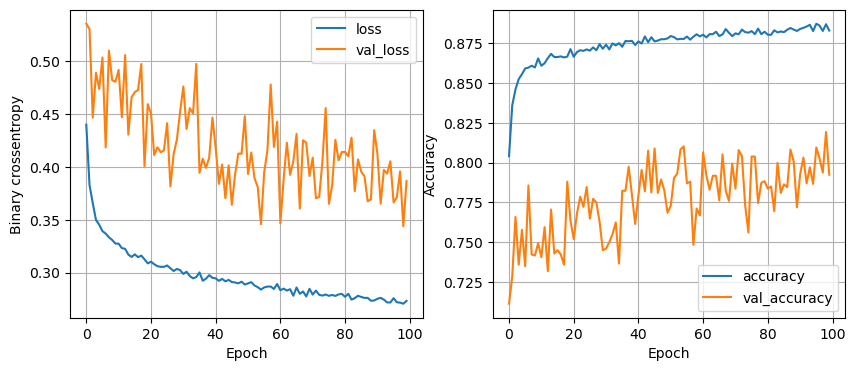

119/119 [==============================] - 0s 3ms/step - loss: 0.3027 - accuracy: 0.8741
nodes : 64, dropout_prob: 0.2, lr: 0.001, batch_size: 32


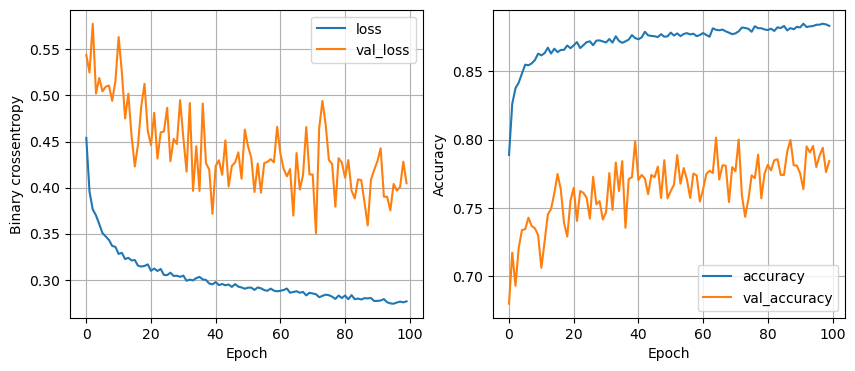

119/119 [==============================] - 0s 2ms/step - loss: 0.2977 - accuracy: 0.8785
nodes : 64, dropout_prob: 0.2, lr: 0.001, batch_size: 64


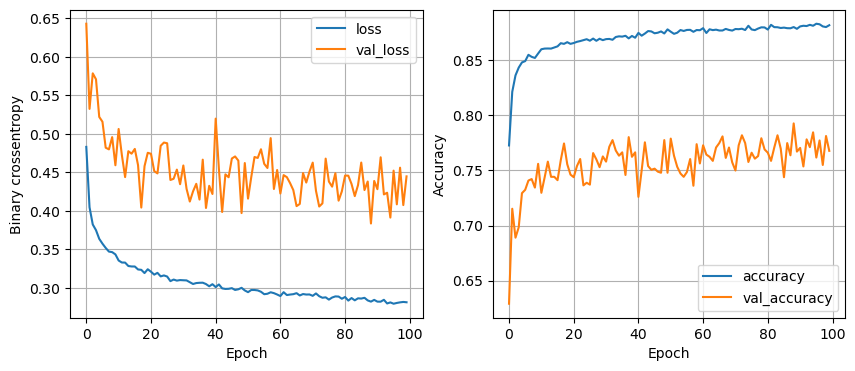

119/119 [==============================] - 0s 2ms/step - loss: 0.3010 - accuracy: 0.8764
nodes : 64, dropout_prob: 0.2, lr: 0.001, batch_size: 128


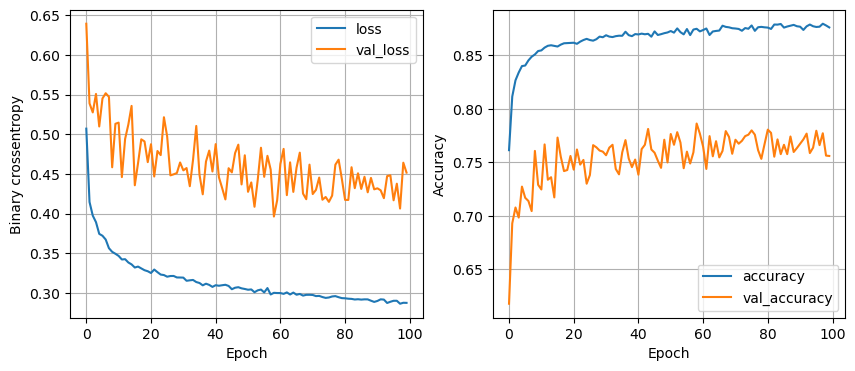

119/119 [==============================] - 0s 2ms/step - loss: 0.3007 - accuracy: 0.8783
nodes : 64, dropout_prob: 0.2, lr: 0.01, batch_size: 16


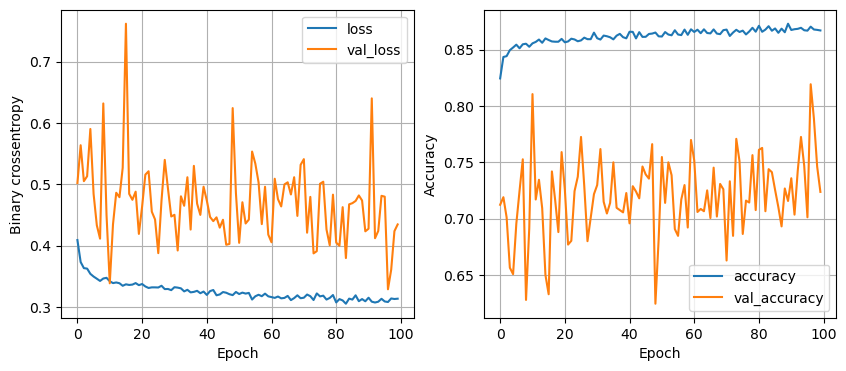

119/119 [==============================] - 0s 2ms/step - loss: 0.3167 - accuracy: 0.8688
nodes : 64, dropout_prob: 0.2, lr: 0.01, batch_size: 32


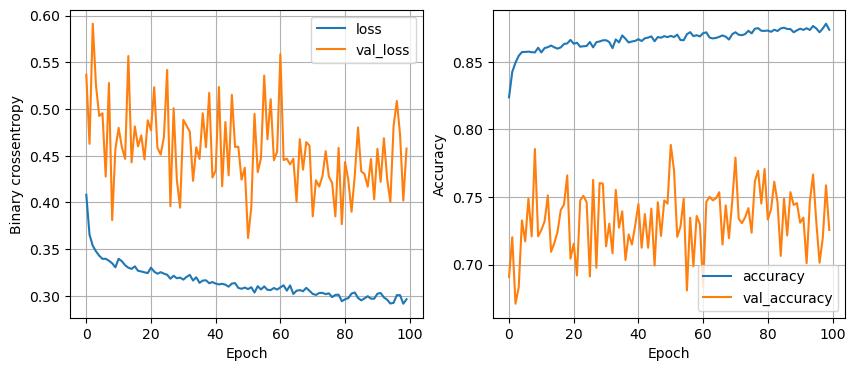

119/119 [==============================] - 0s 3ms/step - loss: 0.3144 - accuracy: 0.8683
nodes : 64, dropout_prob: 0.2, lr: 0.01, batch_size: 64


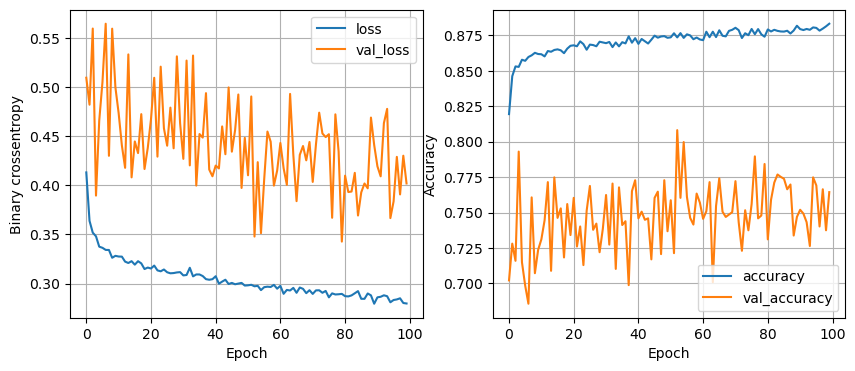

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8722
nodes : 64, dropout_prob: 0.2, lr: 0.01, batch_size: 128


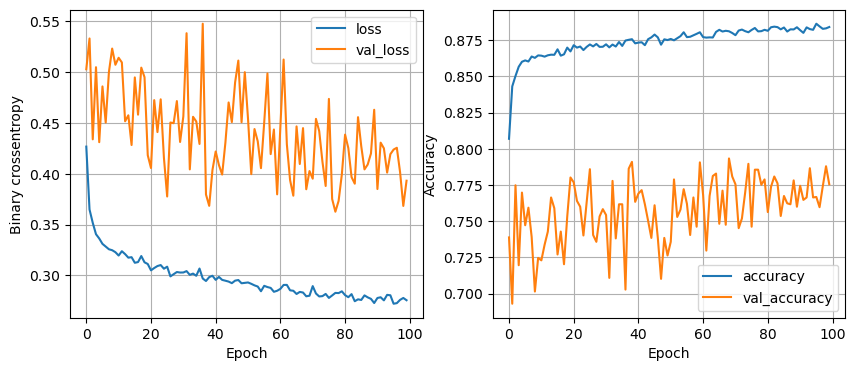

119/119 [==============================] - 0s 2ms/step - loss: 0.3080 - accuracy: 0.8759


In [38]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.005,0.001,0.01]:
            for batch_size in [16,32,64,128]:
                print(f"nodes : {num_nodes}, dropout_prob: {dropout_prob}, lr: {lr}, batch_size: {batch_size}")
                model,history = train_model(X_train,Y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid,Y_valid)[0]
                if val_loss < least_val_loss:
                    val_loss = least_val_loss
                    least_loss_model = model

In [39]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 [==============================] - 0s 1ms/step


In [41]:
print(classification_report(Y_test, y_pred))


              precision    recall  f1-score   support

           0       0.88      0.74      0.80      1362
           1       0.86      0.94      0.90      2442

    accuracy                           0.87      3804
   macro avg       0.87      0.84      0.85      3804
weighted avg       0.87      0.87      0.87      3804

